In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 构建样本数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [4]:
# 先用线性回归进行拟合
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_predict = lr.predict(X)

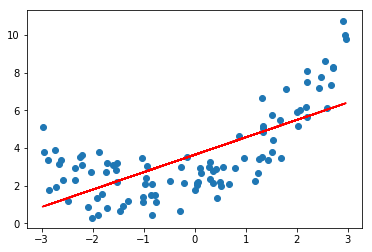

In [5]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [6]:
# 导入均方误差
from sklearn.metrics import mean_squared_error

In [8]:
mean_squared_error(y, y_predict)

2.6823097152963338

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scalar", StandardScaler()),
        ("lr", LinearRegression())
    ])

In [12]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)

In [13]:
mean_squared_error(y, y2_predict)

0.93160950356090177

In [19]:
poly5_reg = PolynomialRegression(degree=5)
poly5_reg.fit(X, y)
y5_predict = poly5_reg.predict(X)

In [20]:
mean_squared_error(y, y5_predict)

0.91189515020672107

In [29]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)

In [30]:
mean_squared_error(y, y100_predict)

0.4885145394655237

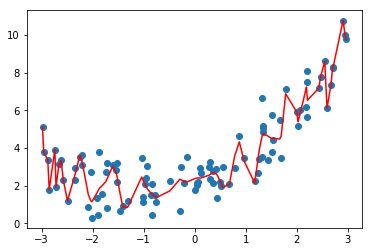

In [31]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

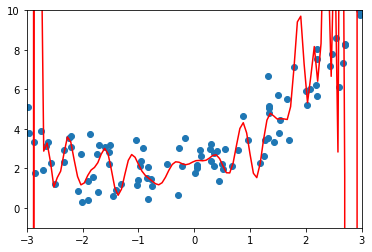

In [32]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()